# Thera Bank Personal Loan Campaign 
### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

#### Data

* ID: Customer ID 
* Age: Customer's age in completed years
* Experience: #years of professional experience 
* Income: Annual income of the customer (`$`000)
* ZIP Code: Home Address ZIP code
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (`$`000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (`$`000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

# 1 Statistical Summary and Null value check: 
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

#### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data processing libraries
import pandas as pd
import numpy as np
from scipy import stats
import os,sys

In [3]:
# import data visualization libraries
import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import machine learning libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function
# calculate accuracy measures and confusion matrix

In [5]:
# import additional libraries

from IPython.display import display # for displaying multiple data frames in one output

pd.options.display.float_format = '{:,.2f}'.format # Remove scientific notations and display numbers with 2 decimal points instead        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

#### Import Data Set(s)
Show clolumns, Shape, Head, and Tail

In [6]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
print(df.columns)
print()
print(df.shape)
print()
pd.concat([df.head(5),df.tail(5)])

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

(5000, 14)



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


#### Reorder Data to Place Personal Loan at End

Reordered to place "Perosonal Loan" as the last column of dataset. 

In [7]:
newOrder=['ID','Age','Education','Experience','Income','Family','ZIP Code','Mortgage','Online','Securities Account', 'CD Account','CreditCard','CCAvg','Personal Loan']
df=df[newOrder]
pd.concat([df.head(5),df.tail(5)])

,ID,Age,Education,Experience,Income,Family,ZIP Code,Mortgage,Online,Securities Account,CD Account,CreditCard,CCAvg,Personal Loan
0,1,25,1,1,49,4,91107,0,0,1,0,0,1.60,0
1,2,45,1,19,34,3,90089,0,0,1,0,0,1.50,0
2,3,39,1,15,11,1,94720,0,0,0,0,0,1.00,0
3,4,35,2,9,100,1,94112,0,0,0,0,0,2.70,0
4,5,35,2,8,45,4,91330,0,0,0,0,1,1.00,0
4995,4996,29,3,3,40,1,92697,0,1,0,0,0,1.90,0
4996,4997,30,1,4,15,4,92037,85,1,0,0,0,0.40,0
4997,4998,63,3,39,24,2,93023,0,0,0,0,0,0.30,0
4998,4999,65,2,40,49,3,90034,0,1,0,0,0,0.50,0
4999,5000,28,1,4,83,3,92612,0,1,0,0,1,0.80,0


#### Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Education           5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   ZIP Code            5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  CCAvg               5000 non-null   float64
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Drop ID column

In [9]:
df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways

#### Statistical Summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Online,"5,000.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"5,000.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


#### Null Values & Duplicates

Zero null entries or duplicate records were found in dataset

In [11]:
df.isnull().sum()

Age                   0
Education             0
Experience            0
Income                0
Family                0
ZIP Code              0
Mortgage              0
Online                0
Securities Account    0
CD Account            0
CreditCard            0
CCAvg                 0
Personal Loan         0
dtype: int64

In [12]:
# look for duplicates
dupes = df.duplicated()
sum(dupes)

0

There are no "null" values in the data set

#### Outlier(s) / Incorrect Inputation(s)

Determine if present and treat accordingly
Found a total of 53 records with incorrect values:  

1. 52 incorrect Experience Values (negative values) and 
2. 1 incorrect ZIP Code (4 digits instead of 5)

Decision to drop from dataset (<1% of records)

In [13]:
incExp = ((df['Experience'] <0)).sum()
print(incExp)

52


In [14]:
incZIP = ((df['ZIP Code'] <90000)).sum()
print(incZIP)

1


In [15]:
# Drop records with negative experience. Confirm same.
negExpIndex=df[df['Experience']<0].index
print(negExpIndex)
df.drop(negExpIndex,inplace=True)
#confirm no more unknowns
negExp=df[['Experience']]
negExp[negExp['Experience']<0]

Int64Index([  89,  226,  315,  451,  524,  536,  540,  576,  583,  597,  649,
             670,  686,  793,  889,  909, 1173, 1428, 1522, 1905, 2102, 2430,
            2466, 2545, 2618, 2717, 2848, 2876, 2962, 2980, 3076, 3130, 3157,
            3279, 3284, 3292, 3394, 3425, 3626, 3796, 3824, 3887, 3946, 4015,
            4088, 4116, 4285, 4411, 4481, 4514, 4582, 4957],
           dtype='int64')


,Experience


In [16]:
# Drop records with incorrect ZIP Code. Confirm same.
incZIPindex=df[df['ZIP Code']<90000].index
print(incZIPindex)
df.drop(incZIPindex,inplace=True)
#confirm no more unknowns
negExp=df[['ZIP Code']]
negExp[negExp['ZIP Code']<90000]

Int64Index([384], dtype='int64')


,ZIP Code


In [17]:
df.info() # to confirm dropped records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4947 non-null   int64  
 1   Education           4947 non-null   int64  
 2   Experience          4947 non-null   int64  
 3   Income              4947 non-null   int64  
 4   Family              4947 non-null   int64  
 5   ZIP Code            4947 non-null   int64  
 6   Mortgage            4947 non-null   int64  
 7   Online              4947 non-null   int64  
 8   Securities Account  4947 non-null   int64  
 9   CD Account          4947 non-null   int64  
 10  CreditCard          4947 non-null   int64  
 11  CCAvg               4947 non-null   float64
 12  Personal Loan       4947 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 541.1 KB


In [18]:
df.describe().T # to see stats with dropped records

,count,mean,std,min,25%,50%,75%,max
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Education,"4,947.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
Family,"4,947.00",2.39,1.15,1.00,1.00,2.00,3.00,4.00
ZIP Code,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
Mortgage,"4,947.00",56.65,101.84,0.00,0.00,0.00,101.00,635.00
Online,"4,947.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
Securities Account,"4,947.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"4,947.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


# 2 EDA: 
Study the data distribution in each attribute and target variable, share your findings (20 marks)

#### Number of unique in each column

In [19]:
# Check number of unique values in a particular column
df.nunique()

Age                    44
Education               3
Experience             44
Income                162
Family                  4
ZIP Code              466
Mortgage              347
Online                  2
Securities Account      2
CD Account              2
CreditCard              2
CCAvg                 108
Personal Loan           2
dtype: int64

#### Number of people with zero mortgage

In [20]:
zeroMort = ((df['Mortgage'] ==0)).sum()
print(zeroMort)

3421


In [21]:
# convert Mortgage data into 0 for Mortgage values of 0 and 1 for Mortgage values greate than 0

a = np.array(df['Mortgage'].values.tolist())
print (a)

df['Mort01'] = np.where(a > 0, 1, a).tolist()
#print (df['Mort01'])

df['Mort01'].value_counts()

[0 0 0 ... 0 0 0]


0    3421
1    1526
Name: Mort01, dtype: int64

#### Number of people with zero credit card spending per month

In [22]:
zeroCC = ((df['CCAvg'] ==0)).sum()
print(zeroCC)

106


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4947 non-null   int64  
 1   Education           4947 non-null   int64  
 2   Experience          4947 non-null   int64  
 3   Income              4947 non-null   int64  
 4   Family              4947 non-null   int64  
 5   ZIP Code            4947 non-null   int64  
 6   Mortgage            4947 non-null   int64  
 7   Online              4947 non-null   int64  
 8   Securities Account  4947 non-null   int64  
 9   CD Account          4947 non-null   int64  
 10  CreditCard          4947 non-null   int64  
 11  CCAvg               4947 non-null   float64
 12  Personal Loan       4947 non-null   int64  
 13  Mort01              4947 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 579.7 KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Education,"4,947.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
Family,"4,947.00",2.39,1.15,1.00,1.00,2.00,3.00,4.00
ZIP Code,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
Mortgage,"4,947.00",56.65,101.84,0.00,0.00,0.00,101.00,635.00
Online,"4,947.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
Securities Account,"4,947.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"4,947.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


#### Value counts of all categorical columns

In [25]:
df['Securities Account'].value_counts()

0    4431
1     516
Name: Securities Account, dtype: int64

In [26]:
df['CD Account'].value_counts()

0    4645
1     302
Name: CD Account, dtype: int64

In [27]:
df['Online'].value_counts()

1    2953
0    1994
Name: Online, dtype: int64

Keep as is, not sekewed

In [28]:
df['CreditCard'].value_counts()

0    3493
1    1454
Name: CreditCard, dtype: int64

In [29]:
df['Personal Loan'].value_counts()

0    4467
1     480
Name: Personal Loan, dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Education,"4,947.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
Family,"4,947.00",2.39,1.15,1.00,1.00,2.00,3.00,4.00
ZIP Code,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
Mortgage,"4,947.00",56.65,101.84,0.00,0.00,0.00,101.00,635.00
Online,"4,947.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
Securities Account,"4,947.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"4,947.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00


#### Univariate Analysis

Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis. 

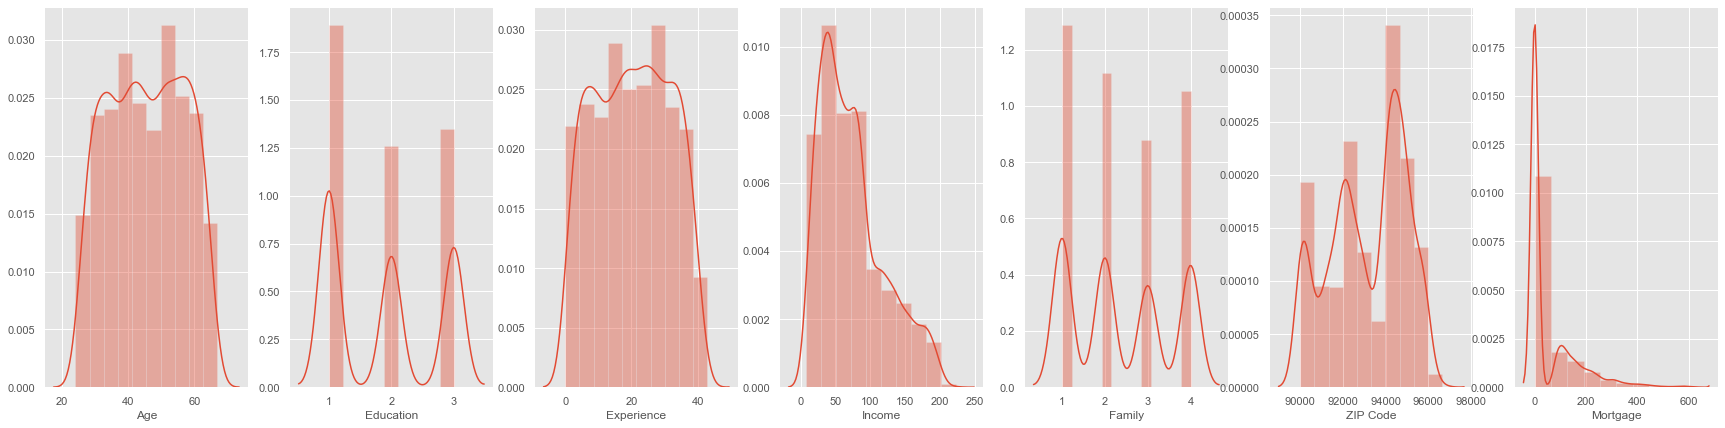

In [31]:
fig, axs = plt.subplots(ncols = 7, figsize = (30, 7))
bins=10
sns.distplot(df['Age'], bins=bins, ax = axs[0])
sns.distplot(df['Education'], ax = axs[1])
sns.distplot(df['Experience'], bins = bins, ax = axs[2])
sns.distplot(df['Income'], bins = bins, ax = axs[3])
sns.distplot(df['Family'], ax = axs[4]);
sns.distplot(df['ZIP Code'], bins=bins, ax = axs[5]);
sns.distplot(df['Mortgage'], bins=bins,ax = axs[6]);

Comment: Mortgage column seems to have high value(s) / entry/ record that would sekew results

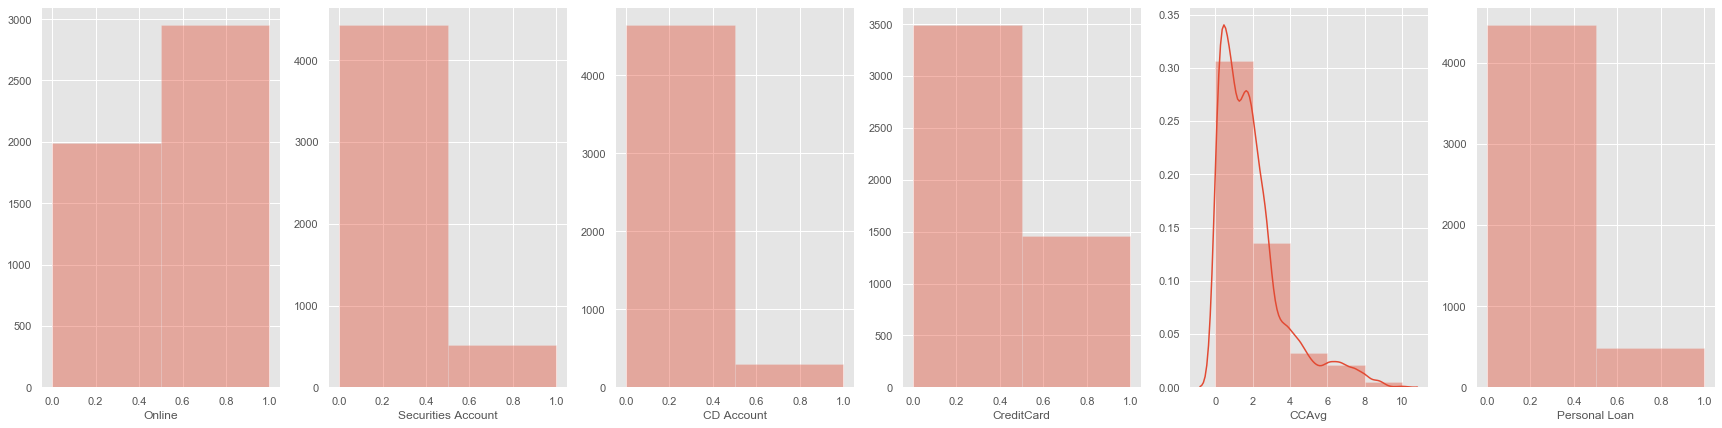

In [32]:
fig, axs = plt.subplots(ncols = 6, figsize = (30, 7))

sns.distplot(df['Online'], bins=2, kde= False, ax = axs[0])
sns.distplot(df['Securities Account'], bins=2,kde= False, ax = axs[1])
sns.distplot(df['CD Account'], bins=2, kde= False, ax = axs[2])
sns.distplot(df['CreditCard'], bins=2, kde= False, ax = axs[3])
sns.distplot(df['CCAvg'], bins = 5, ax = axs[4]);
sns.distplot(df['Personal Loan'], bins=2, kde= False, ax = axs[5]);

In [33]:
df["Personal Loan"].value_counts()

0    4467
1     480
Name: Personal Loan, dtype: int64

In [34]:
df['Personal Loan'].value_counts(normalize=True)*100

0   90.30
1    9.70
Name: Personal Loan, dtype: float64

In [35]:
df.groupby(["Personal Loan"]).mean()

,Age,Education,Experience,Income,Family,ZIP Code,Mortgage,Online,Securities Account,CD Account,CreditCard,CCAvg,Mort01
Personal Loan,,,,,,,,,,,,,
0,45.61,1.84,20.38,66.20,2.37,"93,170.17",51.90,0.60,0.10,0.04,0.29,1.72,0.30
1,45.07,2.23,19.84,144.75,2.61,"93,153.20",100.85,0.61,0.12,0.29,0.30,3.91,0.35


In [36]:
df.groupby(["Personal Loan"]).median()

,Age,Education,Experience,Income,Family,ZIP Code,Mortgage,Online,Securities Account,CD Account,CreditCard,CCAvg,Mort01
Personal Loan,,,,,,,,,,,,,
0,46.00,2.00,20.00,59.00,2.00,"93,460.00",0.00,1.00,0.00,0.00,0.00,1.40,0.00
1,45.00,2.00,20.00,142.50,3.00,"93,407.00",0.00,1.00,0.00,0.00,0.00,3.80,0.00


#### Bivariate Analysis


The goal of bivariate statistics is to explore how two different variables relate to or differ from each other. ... Independent variable is the variable that can be controlled and manipulated in the study.

Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two variables. There are essentially 3 major scenarios that we will come accross when we perform bivariate analysis
1. Both variables of interest are qualitative
2. One variable is qualitative and the other is quantitative
3. Both variables are quantitative

The following plots are not limited to the headings they are under. They are the options we have if we face a certain scenario.

#### Numerical  vs. Numerical
    1. Scatterplot
    2. Line plot
    3. Heatmap for correlation
    4. Joint plot

#### Categorical vs. Numerical
    1. Bar chart
    2. Voilin plot
    3. Categorical box plot
    4. Swarm plot
    
#### Two Categorical Variables 
    1. Bar chart
    2. Grouped bar chart
    3. Point plot

In [37]:
df.columns

Index(['Age', 'Education', 'Experience', 'Income', 'Family', 'ZIP Code',
       'Mortgage', 'Online', 'Securities Account', 'CD Account', 'CreditCard',
       'CCAvg', 'Personal Loan', 'Mort01'],
      dtype='object')

In [38]:
# create bins for Ages, Experience, Income, ZIP Code, and CCAvg

bin_edges1 = [20,25,30,35,40,45,50,55,60,65,70]         # edges to define intervals
bin_labels1 = ['20-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70']               # labels to denote each interval
df['age_bin'] = pd.cut(df['Age'], bins=bin_edges1, labels=bin_labels1, precision=0)
df['age_bin'].value_counts()
#print(df['age_bin'])
df['ages'] = df['age_bin'].cat.codes
#print(df['ages'])

bin_edges2 = [-1,5,10,15,20,25,30,35,40,45]         # edges to define intervals
bin_labels2 = ['-1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45'] # labels to denote each interval
df['exp_bin'] = pd.cut(df['Experience'], bins=bin_edges2, labels=bin_labels2, precision=0)
df['exp_bin'].value_counts()
#print(df['exp_bin'])
df['experience'] = df['exp_bin'].cat.codes
#print(df['experience'])

bin_edges3 = [-1,25,50,75,100,125,150,175,200,225]         # edges to define intervals
bin_labels3 = ['-1-25','26-50','51-75','76-100','101-125','126-150','151-175','176-200','201-225']               # labels to denote each interval
df['inc_bin'] = pd.cut(df['Income'], bins=bin_edges3, labels=bin_labels3, precision=0)
df['inc_bin'].value_counts()
#print(df['inc_bin'])
df['income'] = df['inc_bin'].cat.codes
#print(df['income'])

bin_edges4 = [90000,91000,92000,93000,94000,95000,96000,97000]         # edges to define intervals
bin_labels4 = ['90000-91000','91001-92000','92001-93000','93001-94000','94001-95000','95001-96000','96001-97000']  #labels to denote each interval
df['zip_bin'] = pd.cut(df['ZIP Code'], bins=bin_edges4, labels=bin_labels4, precision=0)
df['zip_bin'].value_counts()
#print(df['zip_bin'])
df['zip'] = df['zip_bin'].cat.codes
#print(df['zip'])

bin_edges6 = [-1,2,5,8,11]         # edges to define intervals
bin_labels6 = ['-1-2', '3-5', '6-8','9-11']     # labels to denote each interval
df['cca_bin'] = pd.cut(df['CCAvg'], bins=bin_edges6, labels=bin_labels6, precision=0)
df['cca_bin'].value_counts()
#print(df['cca_bin'])
df['ccavg'] = df['cca_bin'].cat.codes
#print(df['ccavg'])

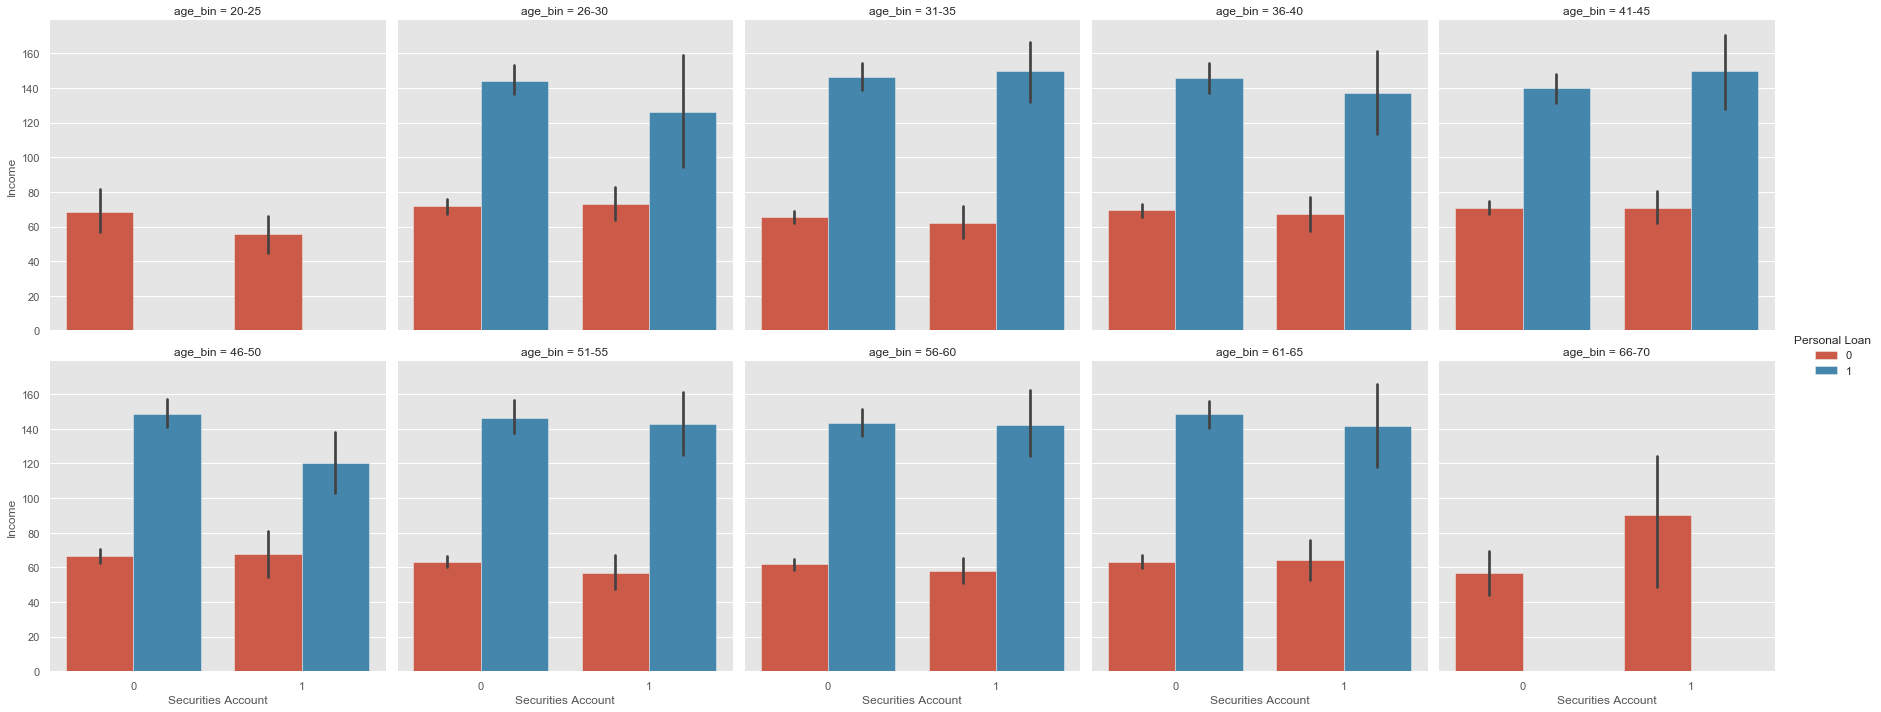

In [39]:
sns.catplot(x='Securities Account', y='Income', hue='Personal Loan', 
            data=df, kind='bar', col='age_bin', col_wrap=5)

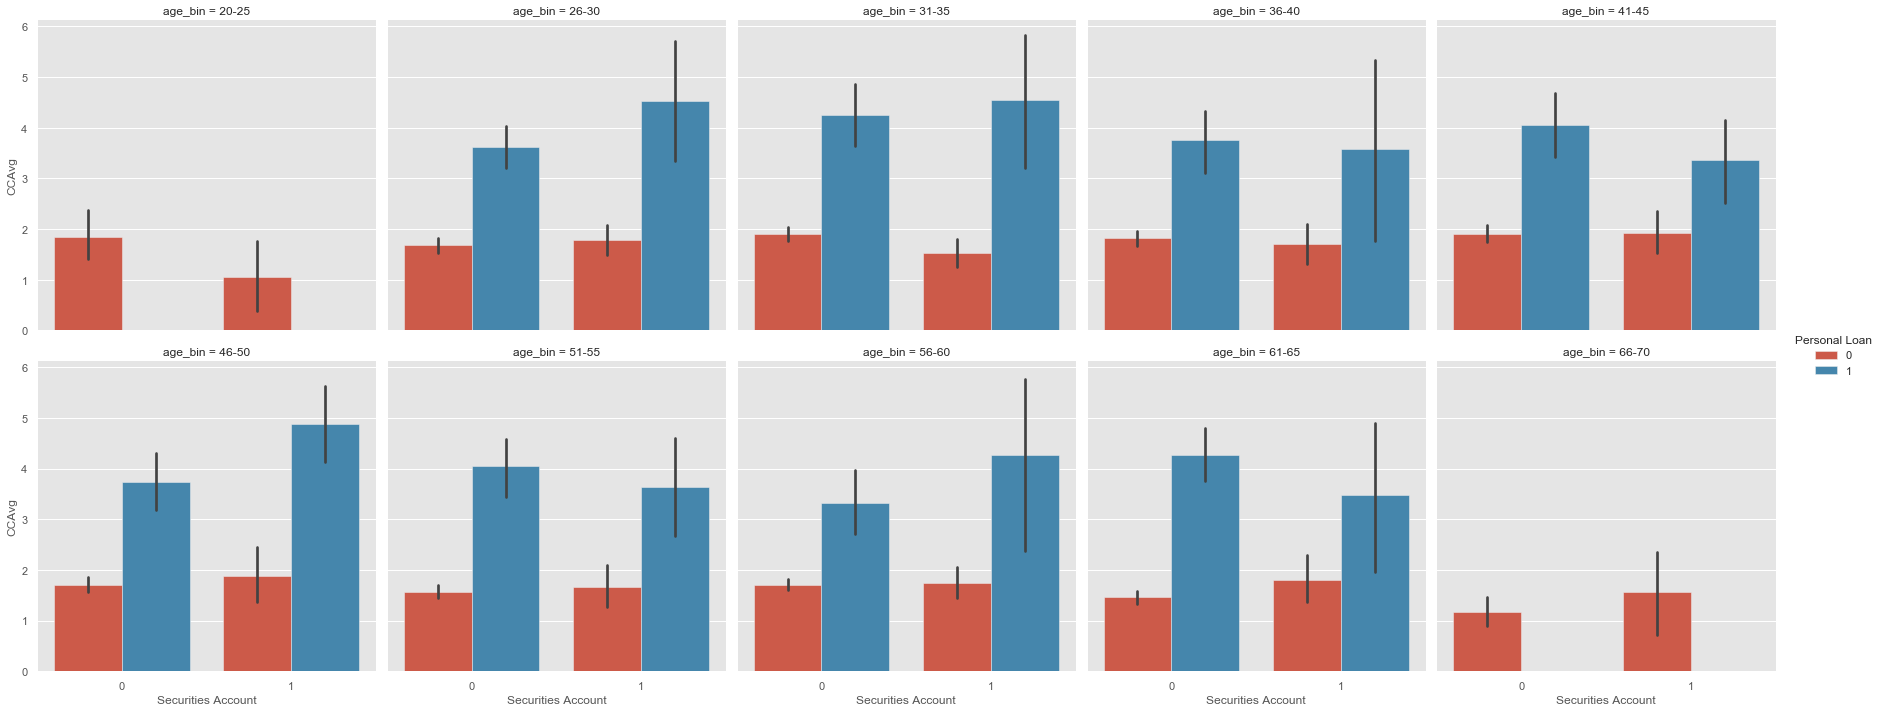

In [40]:
sns.catplot(x='Securities Account', y='CCAvg', hue='Personal Loan', 
            data=df, kind='bar', col='age_bin', col_wrap=5)

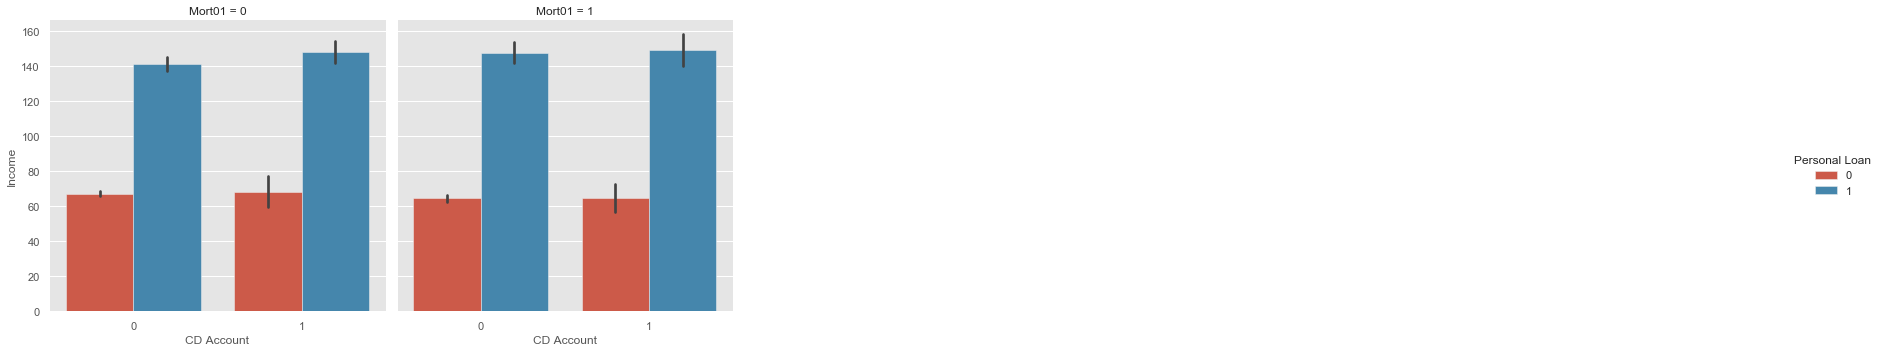

In [41]:
sns.catplot(x='CD Account', y='Income', hue='Personal Loan', 
            data=df, kind='bar', col='Mort01', col_wrap=5)

In [42]:
df.corr()

,Age,Education,Experience,Income,Family,ZIP Code,Mortgage,Online,Securities Account,CD Account,CreditCard,CCAvg,Personal Loan,Mort01,ages,experience,income,zip,ccavg
Age,1.00,0.05,0.99,-0.06,-0.04,-0.03,-0.02,0.01,0.00,0.00,0.01,-0.05,-0.01,-0.01,0.99,0.99,-0.06,-0.03,-0.06
Education,0.05,1.00,0.02,-0.19,0.06,-0.01,-0.03,-0.01,-0.01,0.01,-0.01,-0.13,0.14,0.00,0.05,0.02,-0.18,-0.01,-0.15
Experience,0.99,0.02,1.00,-0.05,-0.05,-0.03,-0.01,0.01,-0.00,0.01,0.01,-0.05,-0.01,-0.01,0.99,0.99,-0.05,-0.03,-0.05
Income,-0.06,-0.19,-0.05,1.00,-0.16,-0.03,0.21,0.01,-0.00,0.17,-0.00,0.65,0.50,-0.00,-0.06,-0.05,0.99,-0.03,0.60
Family,-0.04,0.06,-0.05,-0.16,1.00,0.03,-0.02,0.01,0.02,0.02,0.01,-0.11,0.06,0.00,-0.04,-0.04,-0.15,0.03,-0.09
ZIP Code,-0.03,-0.01,-0.03,-0.03,0.03,1.00,0.00,0.03,0.00,0.02,0.02,-0.01,-0.00,0.01,-0.03,-0.03,-0.03,0.99,-0.01
Mortgage,-0.02,-0.03,-0.01,0.21,-0.02,0.00,1.00,-0.01,-0.00,0.09,-0.01,0.11,0.14,0.83,-0.02,-0.01,0.20,0.01,0.09
Online,0.01,-0.01,0.01,0.01,0.01,0.03,-0.01,1.00,0.02,0.18,0.01,-0.00,0.01,-0.01,0.01,0.01,0.01,0.03,-0.00
Securities Account,0.00,-0.01,-0.00,-0.00,0.02,0.00,-0.00,0.02,1.00,0.32,-0.02,0.01,0.02,-0.00,0.00,0.00,-0.00,-0.00,0.02
CD Account,0.00,0.01,0.01,0.17,0.02,0.02,0.09,0.18,0.32,1.00,0.28,0.14,0.32,0.04,0.01,0.01,0.17,0.02,0.14


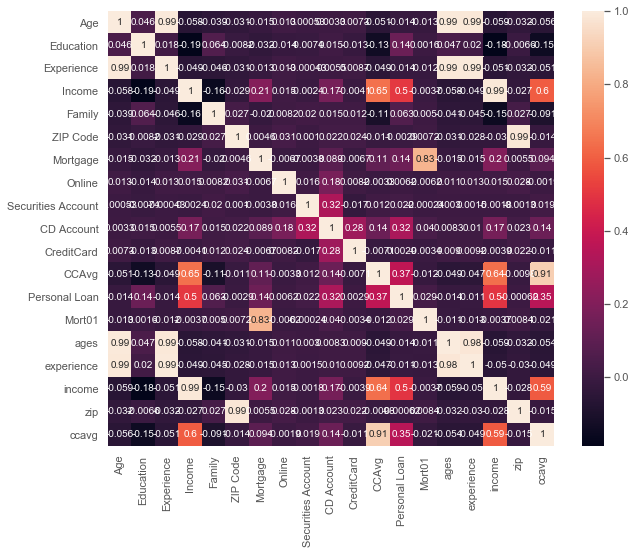

In [43]:
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

Top 5 corrleation coefficients to Personal Loan

1. Income
2. CCAvg 
3. CD Account 
4. Mortgage
5. Education 

#### Multivariate Analysis

Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2

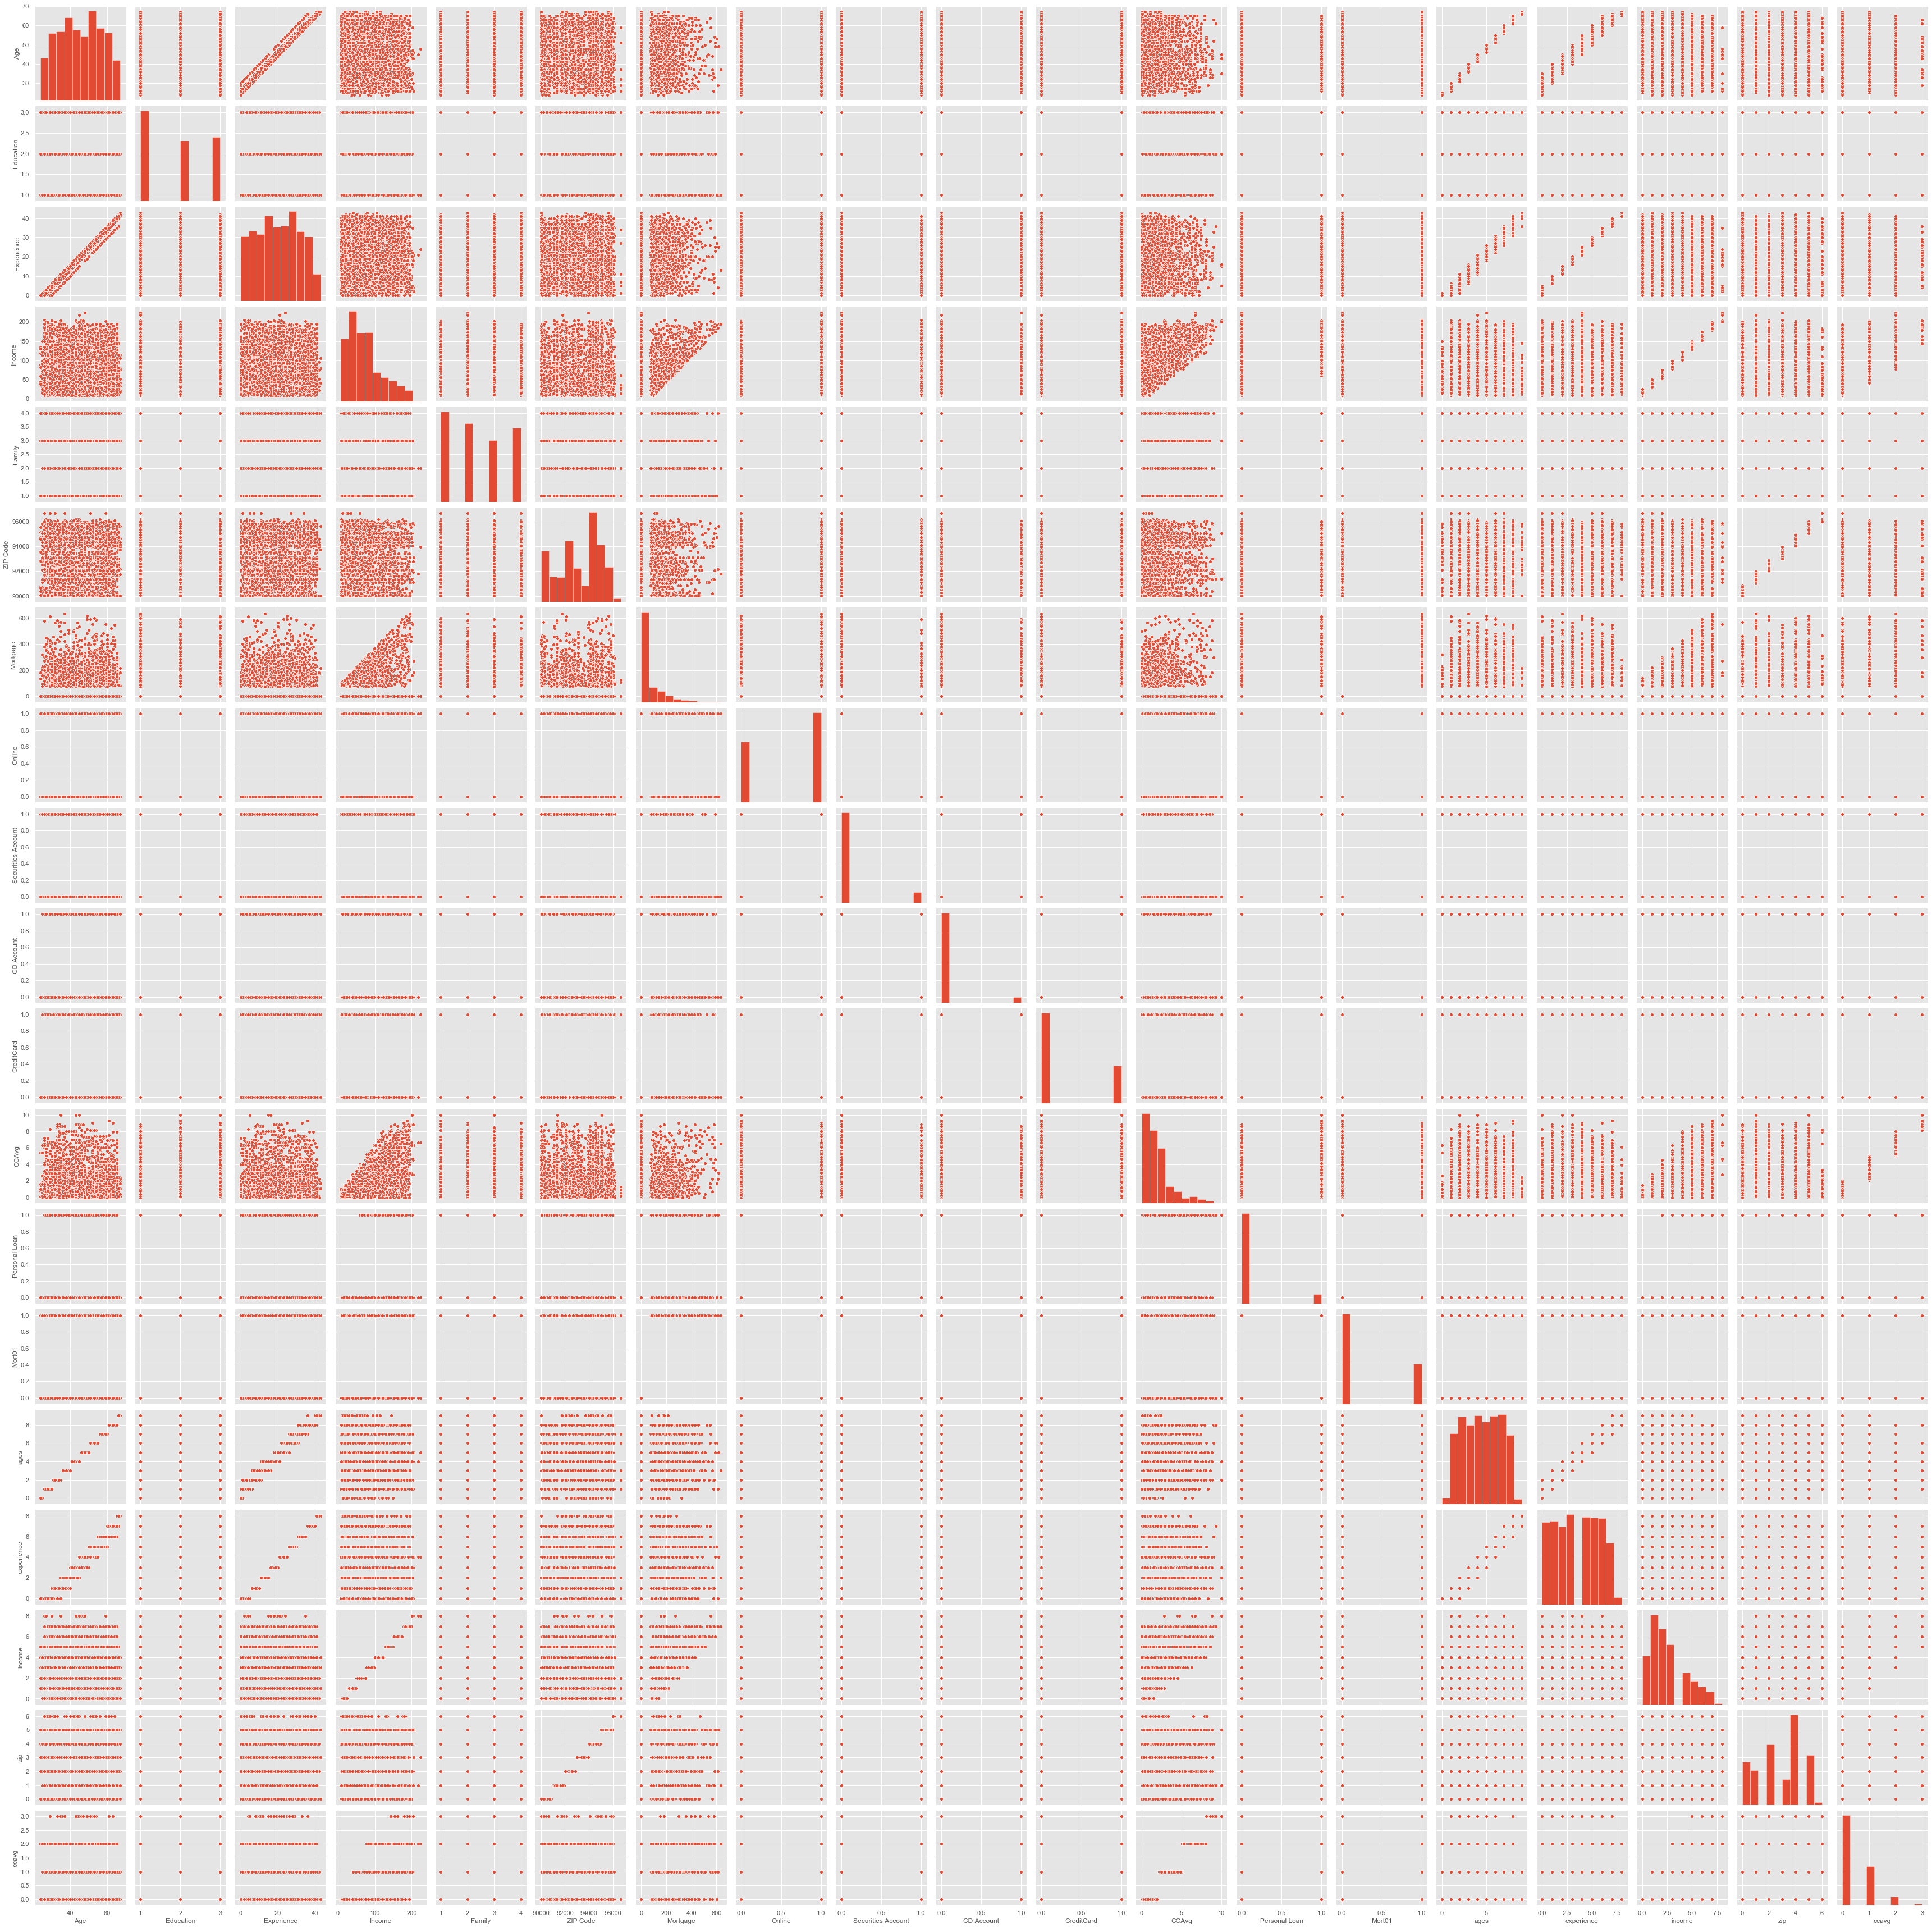

In [44]:
sns.pairplot(df)
plt.show()

#### Get data model ready

In [45]:
dropCols=list(['Education','Family','age_bin','exp_bin','inc_bin','age_bin','zip_bin','Mortgage','cca_bin','ages','ccavg','zip','income','experience'])
dfm=df.drop(columns=dropCols)
dfm.head()

,Age,Experience,Income,ZIP Code,Online,Securities Account,CD Account,CreditCard,CCAvg,Personal Loan,Mort01
0,25,1,49,91107,0,1,0,0,1.60,0,0
1,45,19,34,90089,0,1,0,0,1.50,0,0
2,39,15,11,94720,0,0,0,0,1.00,0,0
3,35,9,100,94112,0,0,0,0,2.70,0,0
4,35,8,45,91330,0,0,0,1,1.00,0,0


In [46]:
dfm.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Online',
       'Securities Account', 'CD Account', 'CreditCard', 'CCAvg',
       'Personal Loan', 'Mort01'],
      dtype='object')

In [47]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = dfm['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64


In [48]:
dfm.info()
dfm.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4947 non-null   int64  
 1   Experience          4947 non-null   int64  
 2   Income              4947 non-null   int64  
 3   ZIP Code            4947 non-null   int64  
 4   Online              4947 non-null   int64  
 5   Securities Account  4947 non-null   int64  
 6   CD Account          4947 non-null   int64  
 7   CreditCard          4947 non-null   int64  
 8   CCAvg               4947 non-null   float64
 9   Personal Loan       4947 non-null   int64  
 10  Mort01              4947 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 623.8 KB


,count,mean,std,min,25%,50%,75%,max
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
ZIP Code,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
Online,"4,947.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
Securities Account,"4,947.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,"4,947.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00
CreditCard,"4,947.00",0.29,0.46,0.00,0.00,0.00,1.00,1.00
CCAvg,"4,947.00",1.94,1.75,0.00,0.70,1.50,2.60,10.00
Personal Loan,"4,947.00",0.10,0.30,0.00,0.00,0.00,0.00,1.00


<b>Select dependent and independent variables </b>

In [49]:
## Define X and Y variables

X = dfm.drop(['Personal Loan'], axis=1)
Y = dfm[['Personal Loan']]

In [50]:
df['PersonalLoan'] = df['Personal Loan'].astype('category')

# 3 Data Split: 
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [51]:
##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

check split of data

In [52]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(dfm.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(dfm.index)) * 100))

69.98% data is in training set
30.02% data is in test set


# 4 Modeling: 
Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [53]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42);
logreg.fit(X_train, y_train);

In [54]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
logreg.coef_

array([[-3.47005686e-04, -2.93123681e-04,  3.61457687e-02,
        -6.44840529e-05, -1.06559029e-05,  1.91160045e-05,
         1.16798973e-04, -7.97285180e-07,  1.00986791e-03,
         1.95077642e-05]])

In [56]:
logreg.intercept_

array([-6.80438847e-07])

In [57]:
y_predict = logreg.predict(X_test)
y_predict = logreg.predict(X_train) #Prediction here are 0s and 1s
y_predict_prob = logreg.predict_proba(X_train) #to get probability values

key variables to look into:

1. C=1.0
2. class_weight=None
3. pentalty = 'L2'
4. solver
5. random_state

Review the results: Accuarcy, Recall or Sensitivity,  Precision or Specificity, Confusion Matrix, F1 score and area under the curve </b>
    
    
 <b> Display the confusion metric </b>

In [58]:
y_predict = logreg.predict(X_train) # Prediction here are 0s and 1s
y_predict_prob = logreg.predict_proba(X_train) # probability values use this snippet

In [59]:
## function to get confusion matrix in a proper format

def draw_cm( actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [60]:
confusion_matrix(y_train,y_predict)

array([[3030,   96],
       [ 232,  104]], dtype=int64)

Trainig accuracy 0.9052570768341999

Testing accuracy 0.9104377104377105

Confusion Matrix
[[3030   96]
 [ 232  104]]


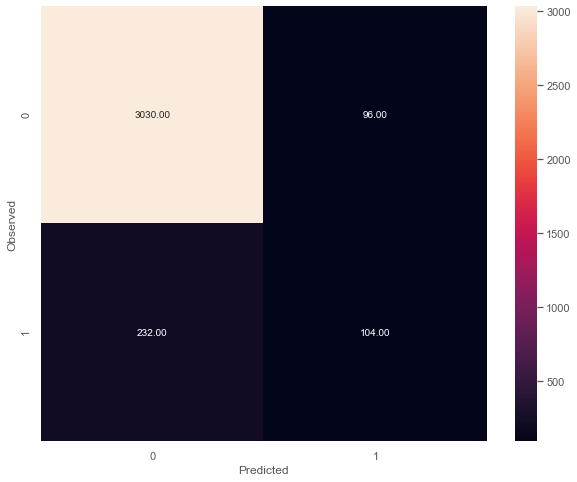

None

Recall: 0.30952380952380953

Precision: 0.52

F1 Score: 0.3880597014925373



In [61]:
# Regression Score
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_train,y_predict))
print()
print("Recall:",recall_score(y_train,y_predict))
print()
print("Precision:",precision_score(y_train,y_predict))
print()
print("F1 Score:",f1_score(y_train,y_predict))
print()

In [62]:
print("Roc Auc Score:",roc_auc_score(y_train,y_predict))

Roc Auc Score: 0.6394068183895439


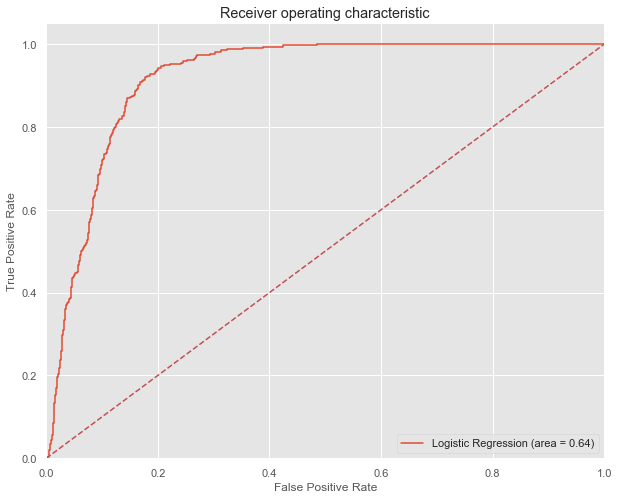

In [63]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
# print thresholds
fpr, tpr, thresholds =roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
FPR=pd.DataFrame(fpr)
FPR.rename(columns = {0:'False Positive Rate'}, inplace = True)
TRP=pd.DataFrame(tpr)
TRP.rename(columns = {0:'True Positive Rate'}, inplace = True)
THRESHOLD=pd.DataFrame(thresholds)
THRESHOLD.rename(columns = {0:'Threshold'}, inplace = True)
result = pd.concat([FPR, TRP, THRESHOLD], axis=1, sort=False)
result.head(10)

,False Positive Rate,True Positive Rate,Threshold
0,0.00,0.00,1.88
1,0.00,0.00,0.88
2,0.00,0.00,0.80
3,0.00,0.00,0.80
4,0.01,0.00,0.77
5,0.01,0.01,0.77
6,0.01,0.01,0.76
7,0.01,0.01,0.76
8,0.01,0.01,0.76
9,0.01,0.02,0.75


# 5 Model Parameters: 
Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

,fpr,tpr,1-fpr,tf,thresholds
0,0.00,0.00,1.00,-1.00,1.88
1,0.00,0.00,1.00,-1.00,0.88
2,0.00,0.00,1.00,-1.00,0.80
3,0.00,0.00,1.00,-1.00,0.80
4,0.01,0.00,0.99,-0.99,0.77


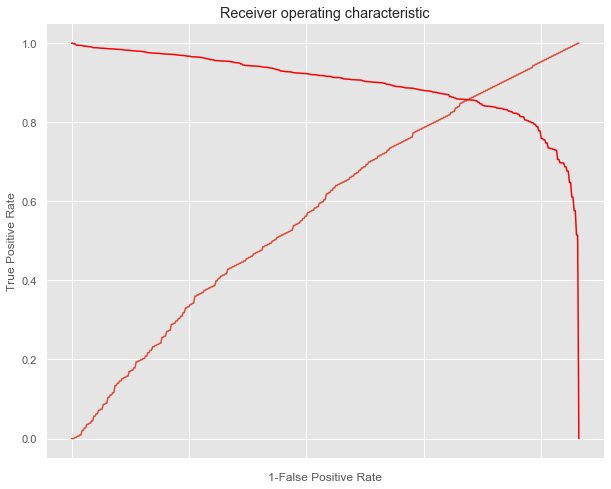

In [65]:
# Goal/Objective = threshold resulting in high TPR is high and FPR is low / where tpr - (1-fpr) is zero or near to zero is the optimal cut off point

import pylab as pl

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(roc.head())

In [66]:
roc[(roc['tpr']>0.6) & (roc['tpr']<0.7)].head(50)

,fpr,tpr,1-fpr,tf,thresholds
215,0.08,0.60,0.92,-0.31,0.24
216,0.08,0.60,0.92,-0.31,0.24
217,0.08,0.62,0.92,-0.30,0.24
218,0.08,0.62,0.92,-0.30,0.24
219,0.08,0.62,0.92,-0.29,0.24
220,0.08,0.62,0.92,-0.29,0.24
221,0.08,0.63,0.92,-0.29,0.24
222,0.09,0.63,0.91,-0.29,0.23
223,0.09,0.63,0.91,-0.28,0.23
224,0.09,0.63,0.91,-0.28,0.23


In [67]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
THRESHOLD = 0.734359
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.90
recall,0.03
precision,0.50
roc_auc_score,0.51


In [68]:
logreg.get_params() # check parameters of logistic regression. If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Run loop to check different values of 'solver'. Note that solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2','liblinear','sag','saga'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs', 'liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75,solver=i)  # changing values of solver
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test) 
    
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.922, 0.905, 0.905, 0.903, 0.903]

[0.927, 0.91, 0.91, 0.903, 0.903]


In [70]:
model = LogisticRegression(random_state=42,penalty='l2')  # change l1 penalty
model.fit(X_train, y_train)
y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9052570768341999

Testing accuracy 0.9104377104377105


In [71]:
model = LogisticRegression(random_state=42, penalty='l2',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8489312536106297

Testing accuracy 0.8565656565656565


In [72]:
# Run loop to check different values of 'C'
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.849, 0.849, 0.849, 0.849, 0.849, 0.849]

[0.857, 0.857, 0.857, 0.857, 0.857, 0.857]


Trainig accuracy 0.8489312536106297

Testing accuracy 0.8565656565656565

Confusion Matrix
[[1148  193]
 [  20  124]]


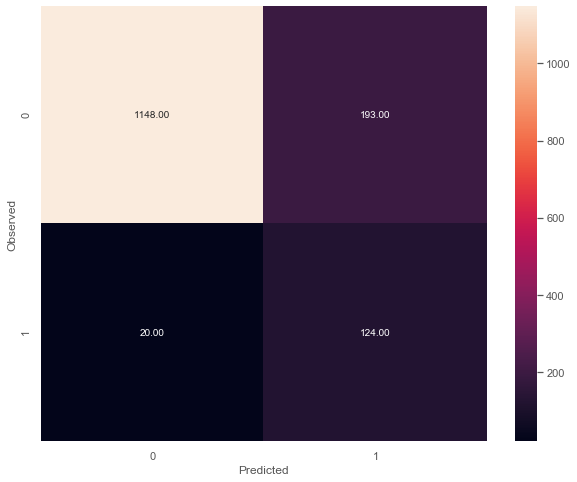

None

Recall: 0.8611111111111112

Precision: 0.3911671924290221

F1 Score: 0.5379609544468548

Roc Auc Score: 0.8585943325876212


In [73]:
# Final model
model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced',C=0.25)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# 6 Business Insight: 
Give Business understanding of model (5 marks)

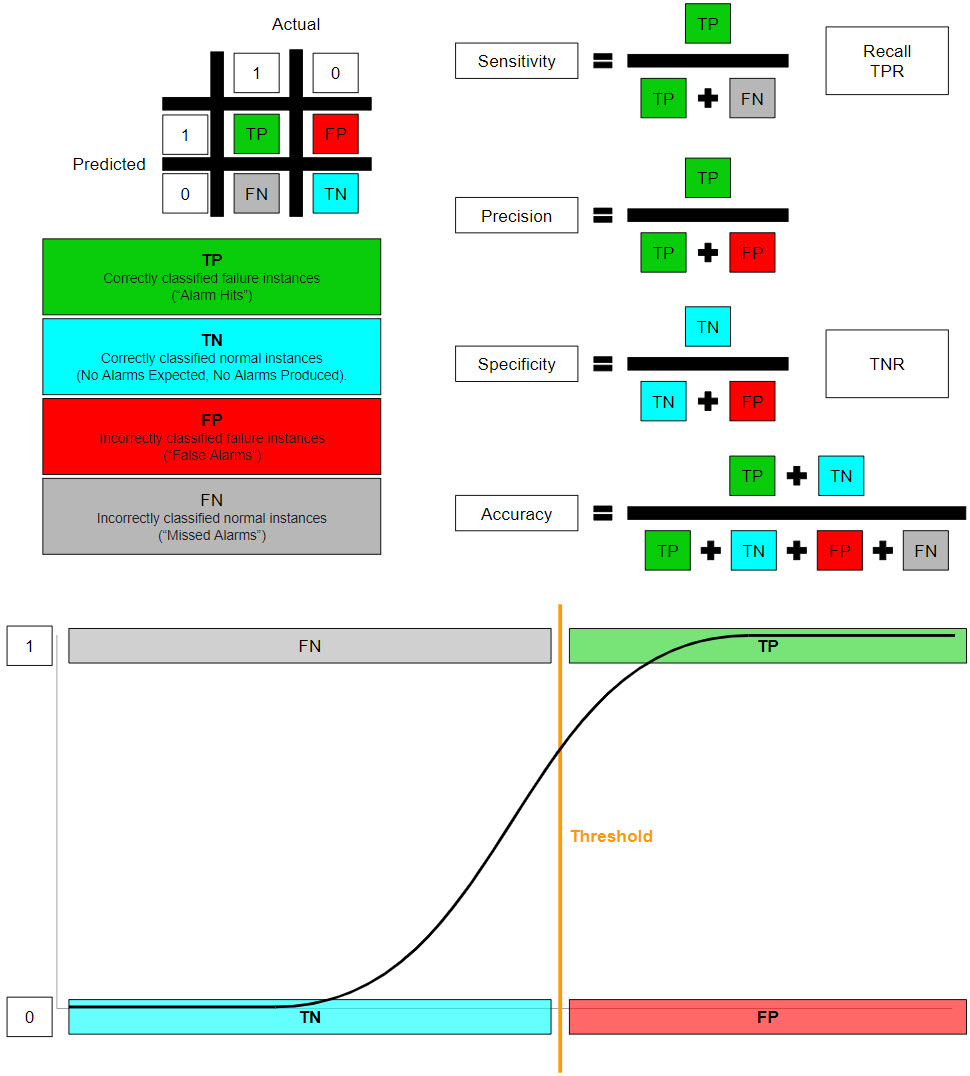

In [74]:
from IPython.display import Image
Image("2020-07-04_21-16-39.jpg")

Defintions of FN, TN, TP, FP with rspect to Personal Loan approval and eligibility: 

FN - not approved but eligible (unwanted outcome) - 1148
TN - not approved and not eligible (desired outcome) - 20
FP - approved and not eligible (unwanted outcome) - 193
TP - approved and eligible (desired outcome) - 124
FN > FP

Objectives for bank should be to:
Minimized unwanted outcomes (FP and FN)